# PROJETO

### DISCIPLINA: INTELIGÊNCIA ARTIFICIAL APLICADA À EDUCAÇÃO

#### PROFESSORES:

ADJA FERREIRA DE ANDRADE

CHARLES ANDRYE GALVAO MADEIRA 

#### ALUNA: 

CINTHIA KATIANE ARAÚJO DO NASCIMENTO

_______________________________________________________________

# INTRODUÇÃO

Antes de começar é necessário destacar alguns conceitos e ferramentas que foram importantes para o desenvolvimento desse projeto.

#### ANÁLISE DE DADOS

![alt text](http://www.know-center.tugraz.at/cms/wp-content/uploads/2016/02/Know-Center_Big-Data-Lab-Datenanalyse-3-2.png "Logo Title Text 1")

#### PANDAS

![alt text](https://pandas.pydata.org/_static/pandas_logo.png "Logo Title Text 1")

#### NUMPY

![alt text](https://www.pytorchtutorial.com/wp-content/uploads/2018/07/numpy-logo.png "Logo Title Text 1")

#### MATPLOTLIB

![alt text](https://matplotlib.org/_static/logo2.png "Logo Title Text 1")

#### NETWORKX

![alt text](http://pyviz.org/assets/networkx.png "Logo Title Text 1")

__________

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# FIRST THINGS FIRST

#### TAREFAS:

* Coleta
* Limpeza

________

#### 1.1 INFORMAÇÕES DOS COMPONENTES E CURRÍCULOS

#### DATASETS UTILIZADOS

Componentes: 

http://dados.ufrn.br/dataset/3fea67e8-6916-4ed0-aaa6-9a8ca06a9bdc/resource/9a3521d2-4bc5-4fda-93f0-f701c8a20727/download/componentes-curriculares-presenciais.csv

Curriculos:

http://dados.ufrn.br/dataset/82aca3f1-f7ee-425e-bf1e-b6a1d6811bf4/resource/3f25d054-c5d2-4bf2-8cd4-8e0a2e4f63ce/download/curriculo-componente-graduacao.csv

### CÓDIGO

In [2]:
df_componentes = pd.read_csv('dados/componentes-curriculares-presenciais.csv',
                            error_bad_lines=False, sep=';', low_memory=False,
                            usecols=['id_componente','tipo_componente', 'codigo', 'nivel', 'nome', 'ch_total', 'equivalencia', 'pre_requisito','co_requisito'])
df_componentes.head()

,id_componente,tipo_componente,codigo,nivel,nome,ch_total,equivalencia,pre_requisito,co_requisito
0,18643,DISCIPLINA,MUT508,T,COMPOSIÇÃO EM MÚSICA POPULAR III,60,NaN,NaN,NaN
1,18644,DISCIPLINA,MUT516,T,CO-REPETIÇÃO,30,NaN,NaN,NaN
2,18645,DISCIPLINA,MUT520,T,CONTRABAIXO ACÚSTICO I,30,NaN,NaN,NaN
3,18646,DISCIPLINA,MUT165,T,PIANO COMPLEMENTAR I,15,NaN,NaN,NaN
4,18647,DISCIPLINA,MUT167,T,PIANO COMPLEMENTAR III,15,NaN,NaN,NaN


In [3]:
df_componentes_imd = df_componentes[df_componentes.codigo.str.contains('IMD', na=False)]
df_componentes_imd.head()

,id_componente,tipo_componente,codigo,nivel,nome,ch_total,equivalencia,pre_requisito,co_requisito
20970,51954,MODULO,IMD0001,L,INOVAÇÃO TECNOLÓGICA,15,NaN,NaN,NaN
21229,52247,MODULO,IMD0002,L,INOVAÇÃO TECNOLÓGICA,30,NaN,NaN,NaN
21230,52248,MODULO,IMD0003,L,PROCESSO E QUALIDADE DE SOFTWARE,30,NaN,NaN,NaN
21231,52249,MODULO,IMD0004,L,GERÊNCIA DE PROJETOS,30,NaN,NaN,NaN
21371,52390,MODULO,IMD0005,L,INOVAÇÃO TECNOLÓGICA,15,NaN,NaN,NaN


In [4]:
df_curriculo = pd.read_csv('dados/curriculo-componente-graduacao.csv',
                            error_bad_lines=False, sep=';')
df_curriculo.head()

,id_curriculo_componente,id_curriculo,id_componente_curricular,semestre_oferta,tipo_vinculo_componente,nivel_ensino
0,129366,100579,23161,8,OPTATIVO,GRADUAÇÃO
1,121276,100302,25440,5,OPTATIVO,GRADUAÇÃO
2,19001074,18999000,25603,1,OBRIGATÓRIO,GRADUAÇÃO
3,116106239,107405556,41803,0,OPTATIVO,GRADUAÇÃO
4,127478,100200,22865,6,OPTATIVO,GRADUAÇÃO


In [5]:
df_curriculo.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)

In [6]:
df_componentes_imd.id_componente = df_componentes_imd.id_componente.astype(np.int64)
df_curriculo.id_componente = df_curriculo.id_componente.astype(np.int64)

C:\Users\Cinthia\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [7]:
df_curriculo_componente = pd.merge(df_curriculo, df_componentes_imd, on='id_componente')
df_curriculo_componente.head()

,id_curriculo_componente,id_curriculo,id_componente,semestre_oferta,tipo_vinculo_componente,nivel_ensino,tipo_componente,codigo,nivel,nome,ch_total,equivalencia,pre_requisito,co_requisito
0,96348490,96335318,52682,6,OPTATIVO,GRADUAÇÃO,MODULO,IMD0406,G,PROTOCOLO E SERVIÇOS DE INTERNET,30,NaN,( IMD0043 ),NaN
1,105757383,105755388,52682,0,OPTATIVO,GRADUAÇÃO,MODULO,IMD0406,G,PROTOCOLO E SERVIÇOS DE INTERNET,30,NaN,( IMD0043 ),NaN
2,96338889,96338399,52682,5,OBRIGATÓRIO,GRADUAÇÃO,MODULO,IMD0406,G,PROTOCOLO E SERVIÇOS DE INTERNET,30,NaN,( IMD0043 ),NaN
3,101667945,101658777,52682,0,OPTATIVO,GRADUAÇÃO,MODULO,IMD0406,G,PROTOCOLO E SERVIÇOS DE INTERNET,30,NaN,( IMD0043 ),NaN
4,101668653,101668583,52682,0,OPTATIVO,GRADUAÇÃO,MODULO,IMD0406,G,PROTOCOLO E SERVIÇOS DE INTERNET,30,NaN,( IMD0043 ),NaN


In [8]:
df_componentes_obrigatorios = df_curriculo_componente[df_curriculo_componente.tipo_vinculo_componente == 'OBRIGATÓRIO']

In [9]:
df_componentes_obrigatorios.nome.value_counts()

PRÁTICAS DE LEITURA E ESCRITA EM PORTUGUÊS II                              16
INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO                                      16
CÁLCULO DIFERENCIAL E INTEGRAL I                                           16
ESTRUTURAS DE DADOS BÁSICAS II                                             16
PROBABILIDADE                                                              16
TECNOLOGIA DA INFORMAÇÃO E SOCIEDADE                                       16
PRÁTICAS DE LEITURA E ESCRITA EM PORTUGUÊS I                               16
ESTRUTURA DE DADOS BÁSICAS I                                               16
VETORES E GEOMETRIA ANALÍTICA                                              16
REDES DE COMPUTADORES                                                      12
FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO II                                    9
LINGUAGEM DE PROGRAMAÇÃO I                                                  9
FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO I                         

In [10]:
df_curriculo_comum = df_componentes_obrigatorios[df_componentes_obrigatorios.id_curriculo == 101658777]

In [11]:
colunas_remover = ['id_curriculo', 'tipo_vinculo_componente', 'nivel_ensino', 'nivel', 'tipo_componente']
df_curriculo_comum = df_curriculo_comum.drop(colunas_remover, axis=1)

In [12]:
df_curriculo_comum

,id_curriculo_componente,id_componente,semestre_oferta,codigo,nome,ch_total,equivalencia,pre_requisito,co_requisito
26,101659808,52665,2,IMD0034,VETORES E GEOMETRIA ANALÍTICA,60,( ECT1112 E ECT1211 ) OU ( ECT2102 ),( IMD0019 ),NaN
102,101659833,55022,2,IMD0028,FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO I,90,( IMD0013 OU DIM0400 OU DIM0115 ),( IMD0019 ),NaN
112,101659835,52664,3,IMD0033,PROBABILIDADE,60,NaN,( IMD0024 ),NaN
280,101659837,55027,4,IMD0040,LINGUAGEM DE PROGRAMAÇÃO II,60,( DIM0111 ) OU ( IMD0035 ) OU ( DIM0116 ),( IMD0030 ),( IMD0039 )
393,101659804,55020,1,IMD0018,PRÁTICAS DE LEITURA EM INGLÊS,30,( IMD0037 OU ECT1307 OU ECT2305 ),NaN,NaN
425,101659803,55019,1,IMD0017,PRÁTICAS DE LEITURA E ESCRITA EM PORTUGUÊS I,30,( IMD0016 OU ECT1105 OU ECT2105 ),NaN,NaN
462,101659807,52650,2,IMD0012,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,90,( DIM0108 ) OU ( IMD1000 ) OU ( DIM0118 ),( IMD0019 ),NaN
602,101659805,55031,1,IMD0019,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,180,( IMD0014 ) OU ( ( IMD1001 E IMD1002 E IMD1003...,NaN,NaN
623,101659806,55021,2,IMD0027,PRÁTICAS DE LEITURA E ESCRITA EM PORTUGUÊS II,30,( IMD0026 OU ECT1205 OU ECT2205 ),( IMD0017 ),NaN
632,101659811,55024,3,IMD0030,LINGUAGEM DE PROGRAMAÇÃO I,60,( DIM0110 ) OU ( IMD0025 ) OU ( DIM0120 ),( IMD0012 ),( IMD0029 )


_____

#### 1.2 INFORMAÇÕES SOBRE TURMAS E MATRÍCULAS

#### DATASETS UTILIZADOS

Turmas (2015 - 2017): 

http://dados.ufrn.br/dataset/turmas

Matriculas (2015 - 2017):

http://dados.ufrn.br/dataset/matriculas-componentes

INFORMAÇÕES ADICIONAIS: 

http://dados.ufrn.br/dataset/dados-complementares-de-discentes

### CÓDIGO

In [13]:
turma_periodo = ['dados/turmas-2015.1.csv','dados/turmas-2015.2.csv',
                 'dados/turmas-2016.1.csv','dados/turmas-2016.2.csv', 
                 'dados/turmas-2017.1.csv','dados/turmas-2017.2.csv',]

colunas = ['id_turma', 'codigo_turma','id_componente_curricular', 'ano','periodo', 'nivel_ensino', 'periodo','situacao_turma']

In [14]:
frames_turmas = [pd.read_csv(periodo, sep=';', usecols=colunas) for periodo in turma_periodo]

In [15]:
df_turmas = pd.concat(frames_turmas)

In [16]:
df_turmas_consolidadas = df_turmas[df_turmas.situacao_turma == 'CONSOLIDADA']
df_turmas_consolidadas.head()

,id_turma,codigo_turma,id_componente_curricular,nivel_ensino,ano,periodo,situacao_turma
0,1217099,01,52922,LATO SENSU,2015,1,CONSOLIDADA
1,1217100,01,52921,LATO SENSU,2015,1,CONSOLIDADA
2,1217101,01,52925,LATO SENSU,2015,1,CONSOLIDADA
3,1217102,01,52920,LATO SENSU,2015,1,CONSOLIDADA
4,1217102,01,52920,LATO SENSU,2015,1,CONSOLIDADA


In [17]:
df_turmas_consolidadas.id_componente_curricular = df_turmas_consolidadas.id_componente_curricular.astype(np.int64)

C:\Users\Cinthia\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [18]:
curriculo_comum = df_curriculo_comum.id_componente.unique()

In [19]:
df_comum = df_turmas_consolidadas.loc[df_turmas_consolidadas['id_componente_curricular'].isin(curriculo_comum)]
df_comum.head()

,id_turma,codigo_turma,id_componente_curricular,nivel_ensino,ano,periodo,situacao_turma
564,1239374,01,55031,GRADUAÇÃO,2015,1,CONSOLIDADA
565,1239374,01,55031,GRADUAÇÃO,2015,1,CONSOLIDADA
626,1239381,02,55031,GRADUAÇÃO,2015,1,CONSOLIDADA
627,1239381,02,55031,GRADUAÇÃO,2015,1,CONSOLIDADA
658,1239386,03,55031,GRADUAÇÃO,2015,1,CONSOLIDADA


In [20]:
matriculas_periodo = ['dados/matricula-2015.1.csv','dados/matricula-2015.2.csv',
                      'dados/matricula-2016.1.csv','dados/matricula-2016.2.csv',
                      'dados/matricula-2017.1.csv','dados/matricula-2017.2.csv',]

colunas_mat = ['descricao','discente','id_curso','id_turma','media_final','nota','reposicao','unidade']

In [21]:
frames_mat = [pd.read_csv(matric, sep=';')[colunas_mat] for matric in matriculas_periodo]

In [22]:
df_matriculas = pd.concat(frames_mat)

In [23]:
df_matriculas.head()

,descricao,discente,id_curso,id_turma,media_final,nota,reposicao,unidade
0,REPROVADO,8833c0e056f90497742882bfcc81b685,100300443.0,57562481,0.0,0.0,f,2.0
1,REPROVADO,8833c0e056f90497742882bfcc81b685,100300443.0,57562481,0.0,0.0,f,3.0
2,APROVADO,7a0a661326418111f7d17aab098757aa,100300443.0,57562481,8.9,8.9,f,1.0
3,APROVADO,7a0a661326418111f7d17aab098757aa,100300443.0,57562481,8.9,8.9,f,2.0
4,APROVADO,7a0a661326418111f7d17aab098757aa,100300443.0,57562481,8.9,8.9,f,3.0


In [24]:
df_turma_matricula = pd.merge(df_comum, df_matriculas, on='id_turma')
df_turma_matricula.head()

,id_turma,codigo_turma,id_componente_curricular,nivel_ensino,ano,periodo,situacao_turma,descricao,discente,id_curso,media_final,nota,reposicao,unidade
0,1239374,01,55031,GRADUAÇÃO,2015,1,CONSOLIDADA,APROVADO POR NOTA,a8e2e545c4b9385773d1fd98188f6f59,92127264.0,6.9,6.9,f,1.0
1,1239374,01,55031,GRADUAÇÃO,2015,1,CONSOLIDADA,APROVADO POR NOTA,a8e2e545c4b9385773d1fd98188f6f59,92127264.0,6.9,7.5,f,2.0
2,1239374,01,55031,GRADUAÇÃO,2015,1,CONSOLIDADA,APROVADO POR NOTA,a8e2e545c4b9385773d1fd98188f6f59,92127264.0,6.9,6.4,f,3.0
3,1239374,01,55031,GRADUAÇÃO,2015,1,CONSOLIDADA,APROVADO,43d1599597afbfed9686ba29bbe77507,92127264.0,8.6,9.5,f,1.0
4,1239374,01,55031,GRADUAÇÃO,2015,1,CONSOLIDADA,APROVADO,43d1599597afbfed9686ba29bbe77507,92127264.0,8.6,8.6,f,2.0


In [25]:
colunas_remover = ['codigo_turma', 'nivel_ensino', 'situacao_turma']
df_turma_matricula = df_turma_matricula.drop(colunas_remover, axis=1)

In [26]:
df_turma_matricula.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)
df_turma_matricula.head()

,id_turma,id_componente,ano,periodo,descricao,discente,id_curso,media_final,nota,reposicao,unidade
0,1239374,55031,2015,1,APROVADO POR NOTA,a8e2e545c4b9385773d1fd98188f6f59,92127264.0,6.9,6.9,f,1.0
1,1239374,55031,2015,1,APROVADO POR NOTA,a8e2e545c4b9385773d1fd98188f6f59,92127264.0,6.9,7.5,f,2.0
2,1239374,55031,2015,1,APROVADO POR NOTA,a8e2e545c4b9385773d1fd98188f6f59,92127264.0,6.9,6.4,f,3.0
3,1239374,55031,2015,1,APROVADO,43d1599597afbfed9686ba29bbe77507,92127264.0,8.6,9.5,f,1.0
4,1239374,55031,2015,1,APROVADO,43d1599597afbfed9686ba29bbe77507,92127264.0,8.6,8.6,f,2.0


In [27]:
df_turma_matricula = df_turma_matricula.loc[~df_turma_matricula['descricao'].isin(['INDEFERIDO', 'CANCELADO', 'EXCLUIDA', 'DESISTENCIA'])]
df_turma_matricula.head()

,id_turma,id_componente,ano,periodo,descricao,discente,id_curso,media_final,nota,reposicao,unidade
0,1239374,55031,2015,1,APROVADO POR NOTA,a8e2e545c4b9385773d1fd98188f6f59,92127264.0,6.9,6.9,f,1.0
1,1239374,55031,2015,1,APROVADO POR NOTA,a8e2e545c4b9385773d1fd98188f6f59,92127264.0,6.9,7.5,f,2.0
2,1239374,55031,2015,1,APROVADO POR NOTA,a8e2e545c4b9385773d1fd98188f6f59,92127264.0,6.9,6.4,f,3.0
3,1239374,55031,2015,1,APROVADO,43d1599597afbfed9686ba29bbe77507,92127264.0,8.6,9.5,f,1.0
4,1239374,55031,2015,1,APROVADO,43d1599597afbfed9686ba29bbe77507,92127264.0,8.6,8.6,f,2.0


In [28]:
df_info_complementar = pd.read_csv('http://dados.ufrn.br/dataset/80b1a8e9-2e40-4c6c-97ea-d595a3c8b8f5/resource/0e287fe5-badb-4b34-b1bf-8815db5dfbeb/download/dados-pessoais-discentes',
sep=';')
df_info_complementar.rename(columns={'id_discente': 'discente'}, inplace=True)

df_info_complementar.head()

,discente,sexo,data_nascimento,raca,estado_origem,cidade_origem,estado,municipio,bairro,nivel_ensino,forma_ingresso,ano_ingresso,periodo_ingresso,cotista
0,0e356f33d9f25c70bd7b98ef1bd1ecd4,M,03-10-1943,Não Informado,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,NEOPOLIS,GRADUAÇÃO,VESTIBULAR,1969,1.0,f
1,a3f7753971d7ca9c1648616b1f7e4c48,M,21-02-1949,Não Informado,Rio de Janeiro,NaN,NaN,NaN,NaN,GRADUAÇÃO,VESTIBULAR,1970,1.0,f
2,d29e0a56e3cc973750e2d2cbabedc449,F,09-09-1947,Não Informado,NaN,NaN,NaN,NaN,NaN,GRADUAÇÃO,VESTIBULAR,1970,1.0,f
3,d4f89fe5c6dd43692b3c1fc4ce324fd5,M,22-04-1949,Não Informado,Rio Grande do Norte,NaN,NaN,NaN,NaN,GRADUAÇÃO,VESTIBULAR,1970,1.0,f
4,e2f244371122aea4140427ada6f391b4,M,21-03-1944,Não Informado,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,ALECRIM,GRADUAÇÃO,VESTIBULAR,1970,1.0,f


In [29]:
df_info = pd.merge(df_turma_matricula, df_info_complementar, on='discente')
df_info.drop(['nivel_ensino','ano_ingresso', 'periodo_ingresso'], axis=1)
df_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34967 entries, 0 to 34966
Data columns (total 24 columns):
id_turma            34967 non-null int64
id_componente       34967 non-null int64
ano                 34967 non-null int64
periodo             34967 non-null int64
descricao           34967 non-null object
discente            34967 non-null object
id_curso            34887 non-null float64
media_final         34048 non-null float64
nota                34098 non-null float64
reposicao           34589 non-null object
unidade             34589 non-null float64
sexo                34967 non-null object
data_nascimento     34967 non-null object
raca                34967 non-null object
estado_origem       34874 non-null object
cidade_origem       34940 non-null object
estado              34508 non-null object
municipio           34508 non-null object
bairro              30377 non-null object
nivel_ensino        34967 non-null object
forma_ingresso      34967 non-null object
ano_ingre

____

# WHAT COMES NEXT?

#### TAREFA:

* Análise
* Plotagem
* Conclusão
_____

### O que mais afeta o desempenho dos alunos nas disciplinas?

#### Questionamentos 

- Os alunos que entraram com cotas possui desempenho melhor ou pior que os não cotistas?
- Os alunos apresentam melhor desempenho em alguma unidade em particular?
- Qual o comportamento dos alunos quando tiram nota ruim?
- Qual o comportamento dos alunos quando vão para quarta prova? Quantos passam?
- Algum componente possui rendimento melhor/pior?

## Os alunos que entraram com cotas possui desempenho melhor ou pior que os não cotistas?

In [30]:
cotistas = df_info[df_info.cotista == 't']
n_cotistas = df_info[df_info.cotista == 'f']

In [31]:
print("\nCOTISTAS")
print(cotistas.descricao.value_counts(normalize=True)*100)
print("\nNÃO COTISTAS")
print(n_cotistas.descricao.value_counts(normalize=True)*100)


COTISTAS
APROVADO POR NOTA                   37.650027
REPROVADO                           21.556192
APROVADO                            21.283415
REPROVADO POR MÉDIA E POR FALTAS    16.973541
TRANCADO                             2.277687
REPROVADO POR NOTA                   0.163666
REPROVADO POR FALTAS                 0.081833
REPROVADO POR NOTA E FALTA           0.013639
Name: descricao, dtype: float64

NÃO COTISTAS
APROVADO POR NOTA                   36.861548
APROVADO                            22.223317
REPROVADO                           21.647047
REPROVADO POR MÉDIA E POR FALTAS    16.071517
TRANCADO                             2.901049
REPROVADO POR NOTA                   0.201941
REPROVADO POR FALTAS                 0.093582
Name: descricao, dtype: float64


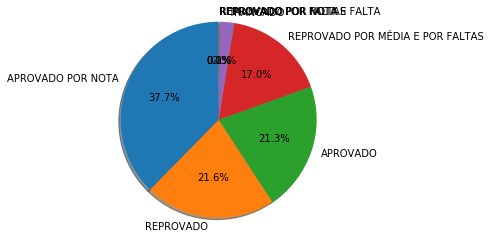

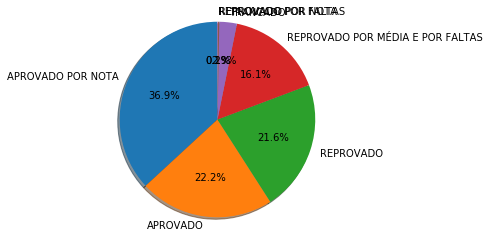

In [32]:
# Cotista
n_sizes = 100. * cotistas.descricao.value_counts(normalize=True) 
labels = n_sizes.index
sizes = n_sizes.values

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

# Nao Cotista
n_sizes = 100. * n_cotistas.descricao.value_counts(normalize=True) 
labels = n_sizes.index
sizes = n_sizes.values

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

In [33]:
print("Cotista: ",cotistas.nota.mean())
print("Não cotista: ",n_cotistas.nota.mean())

Cotista:  4.455220241921455
Não cotista:  4.510820255038883


## Os alunos apresentam melhor desempenho em alguma unidade em particular?

In [34]:
primeira = df_info[df_info.unidade == 1.0]
segunda = df_info[df_info.unidade == 2.0]
terceira = df_info[df_info.unidade == 3.0]
print("Primeira: ", primeira.nota.mean())
print("Segunda: ", segunda.nota.mean())
print("Terceira: ", terceira.nota.mean())

Primeira:  4.8036611057446414
Segunda:  4.656704891637953
Terceira:  3.854331042211619


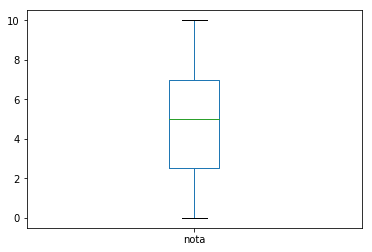

In [35]:
df_info[df_info.unidade == 1.0]['nota'].plot(kind='box')

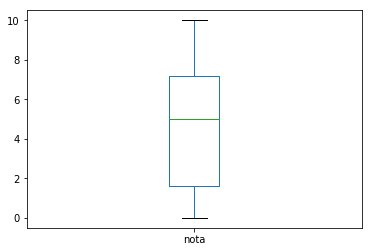

In [36]:
df_info[df_info.unidade == 2.0]['nota'].plot(kind='box')

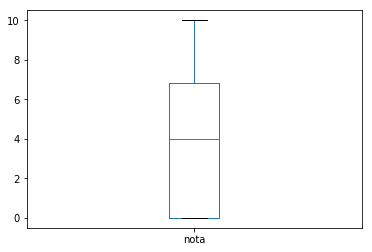

In [37]:
df_info[df_info.unidade == 3.0]['nota'].plot(kind='box')

## Qual o comportamento dos alunos quando tiram nota ruim?

REPROVADO                           37.092308
REPROVADO POR MÉDIA E POR FALTAS    30.492308
APROVADO POR NOTA                   29.184615
APROVADO                             2.230769
TRANCADO                             0.830769
REPROVADO POR NOTA                   0.107692
REPROVADO POR FALTAS                 0.061538
Name: descricao, dtype: float64


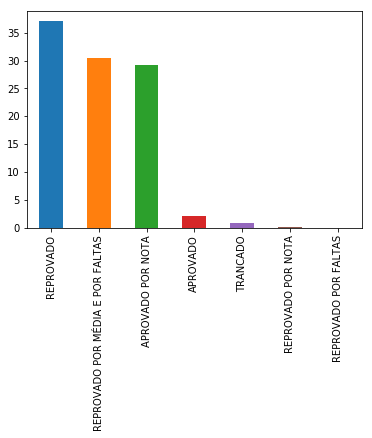

In [38]:
results = df_turma_matricula.loc[(df_turma_matricula.unidade == 1.0) & (df_turma_matricula.nota < 5)]
print (results.descricao.value_counts(normalize=True)*100)
(results.descricao.value_counts(normalize=True)*100).plot(kind='bar')

APROVADO POR NOTA                   39.986897
REPROVADO                           36.776589
REPROVADO POR MÉDIA E POR FALTAS    20.244595
APROVADO                             2.686176
REPROVADO POR NOTA                   0.131033
TRANCADO                             0.087355
REPROVADO POR FALTAS                 0.087355
Name: descricao, dtype: float64


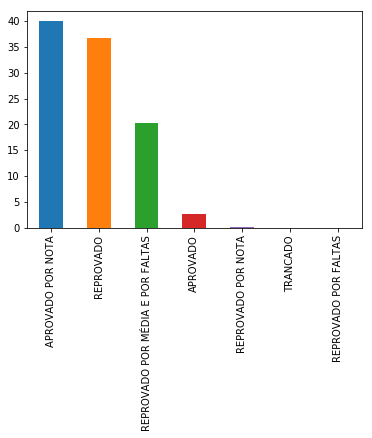

In [39]:
results = df_turma_matricula.loc[(df_turma_matricula.unidade == 1.0) & (df_turma_matricula.nota < 5) & (df_turma_matricula.nota > 1)]
print (results.descricao.value_counts(normalize=True)*100)
(results.descricao.value_counts(normalize=True)*100).plot(kind='bar')

REPROVADO POR MÉDIA E POR FALTAS    55.513308
REPROVADO                           36.730038
TRANCADO                             3.650190
APROVADO POR NOTA                    2.661597
APROVADO                             1.444867
Name: descricao, dtype: float64


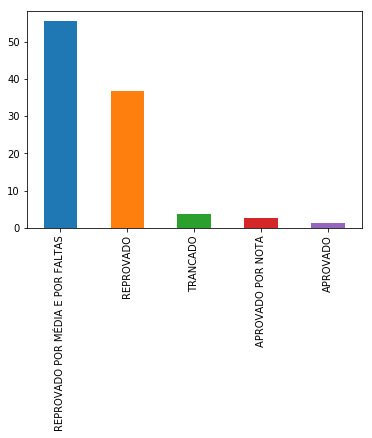

In [40]:
results = df_turma_matricula.loc[(df_turma_matricula.unidade == 1.0) & (df_turma_matricula.nota == 0)]
print (results.descricao.value_counts(normalize=True)*100)
(results.descricao.value_counts(normalize=True)*100).plot(kind='bar')

## Qual o comportamento dos alunos quando vão para quarta prova? Quantos passam?

APROVADO POR NOTA                   1281
REPROVADO                            385
APROVADO                             161
REPROVADO POR NOTA                    12
REPROVADO POR MÉDIA E POR FALTAS       1
Name: descricao, dtype: int64


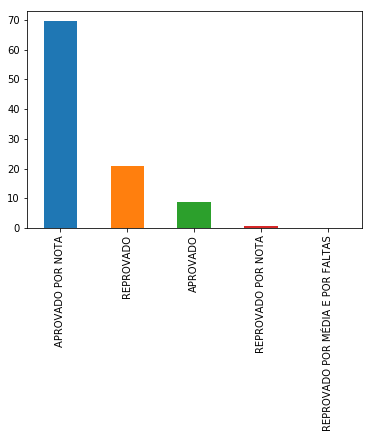

In [41]:
results = df_turma_matricula.loc[(df_turma_matricula.reposicao == 't')]
print (results.descricao.value_counts())
(results.descricao.value_counts(normalize=True)*100).plot(kind='bar')

## Algum componente possui rendimento melhor/pior?

In [42]:
total = pd.merge(df_turma_matricula, df_curriculo_comum, on='id_componente')
results = total.sort_values('unidade').drop_duplicates(subset=['id_turma', 'discente'], keep='last')


In [47]:
reprovados = results[results['descricao'] == 'REPROVADO']
#disciplina_mais_reprova = pd.merge(reprovados, df_curriculo_comum, on='id_componente')
reprovacoes = reprovados.nome.value_counts()
reprovacoes

FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO I          359
VETORES E GEOMETRIA ANALÍTICA                    345
CÁLCULO DIFERENCIAL E INTEGRAL I                 228
RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI       219
LINGUAGEM DE PROGRAMAÇÃO I                       141
FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO II         137
ESTRUTURA DE DADOS BÁSICAS I                     116
PRÁTICAS DE LEITURA E ESCRITA EM PORTUGUÊS I      83
TECNOLOGIA DA INFORMAÇÃO E SOCIEDADE              48
LINGUAGEM DE PROGRAMAÇÃO II                       46
PRÁTICAS DE LEITURA E ESCRITA EM PORTUGUÊS II     41
PROBABILIDADE                                     38
ESTRUTURAS DE DADOS BÁSICAS II                    38
PRÁTICAS DE LEITURA EM INGLÊS                     32
Name: nome, dtype: int64

In [48]:
aprovados = results[results['descricao'] == 'APROVADO']
#disciplina_mais_aprova = pd.merge(aprovados, df_curriculo_comum, on='id_componente')
aprovacoes = aprovados.nome.value_counts()
aprovacoes

TECNOLOGIA DA INFORMAÇÃO E SOCIEDADE             527
PRÁTICAS DE LEITURA E ESCRITA EM PORTUGUÊS I     496
PRÁTICAS DE LEITURA EM INGLÊS                    296
RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI       176
PRÁTICAS DE LEITURA E ESCRITA EM PORTUGUÊS II    162
VETORES E GEOMETRIA ANALÍTICA                    154
LINGUAGEM DE PROGRAMAÇÃO I                       146
ESTRUTURA DE DADOS BÁSICAS I                     140
ESTRUTURAS DE DADOS BÁSICAS II                   117
LINGUAGEM DE PROGRAMAÇÃO II                      114
CÁLCULO DIFERENCIAL E INTEGRAL I                 100
FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO I           76
PROBABILIDADE                                     68
FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO II          33
Name: nome, dtype: int64

In [51]:
rpmti = results.loc[(total.nome == 'RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI')]
fmci = results.loc[(total.nome == 'FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO I')]
fmcii = results.loc[(total.nome == 'FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO II')]

In [52]:
rpmti.descricao.value_counts()

APROVADO POR NOTA                   435
REPROVADO                           219
REPROVADO POR MÉDIA E POR FALTAS    199
APROVADO                            176
TRANCADO                             50
REPROVADO POR FALTAS                  2
Name: descricao, dtype: int64

In [53]:
fmci.descricao.value_counts()

REPROVADO                           359
APROVADO POR NOTA                   256
REPROVADO POR MÉDIA E POR FALTAS    219
TRANCADO                             95
APROVADO                             76
REPROVADO POR NOTA                    3
REPROVADO POR FALTAS                  1
Name: descricao, dtype: int64

In [54]:
fmcii.descricao.value_counts()

REPROVADO POR MÉDIA E POR FALTAS    168
REPROVADO                           137
APROVADO POR NOTA                   117
APROVADO                             33
TRANCADO                             22
Name: descricao, dtype: int64

### Trabalhos Futuros
_____________________

In [57]:
df_grade = df_curriculo_comum
df_grade.pre_requisito = df_grade.pre_requisito.str.replace('(', '')
df_grade.pre_requisito = df_grade.pre_requisito.str.replace(')', '')
df_grade.pre_requisito = df_grade.pre_requisito.str.replace(' ', '')
df_grade.head()

,id_curriculo_componente,id_componente,semestre_oferta,codigo,nome,ch_total,equivalencia,pre_requisito,co_requisito
26,101659808,52665,2,IMD0034,VETORES E GEOMETRIA ANALÍTICA,60,( ECT1112 E ECT1211 ) OU ( ECT2102 ),IMD0019,NaN
102,101659833,55022,2,IMD0028,FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO I,90,( IMD0013 OU DIM0400 OU DIM0115 ),IMD0019,NaN
112,101659835,52664,3,IMD0033,PROBABILIDADE,60,NaN,IMD0024,NaN
280,101659837,55027,4,IMD0040,LINGUAGEM DE PROGRAMAÇÃO II,60,( DIM0111 ) OU ( IMD0035 ) OU ( DIM0116 ),IMD0030,( IMD0039 )
393,101659804,55020,1,IMD0018,PRÁTICAS DE LEITURA EM INGLÊS,30,( IMD0037 OU ECT1307 OU ECT2305 ),NaN,NaN


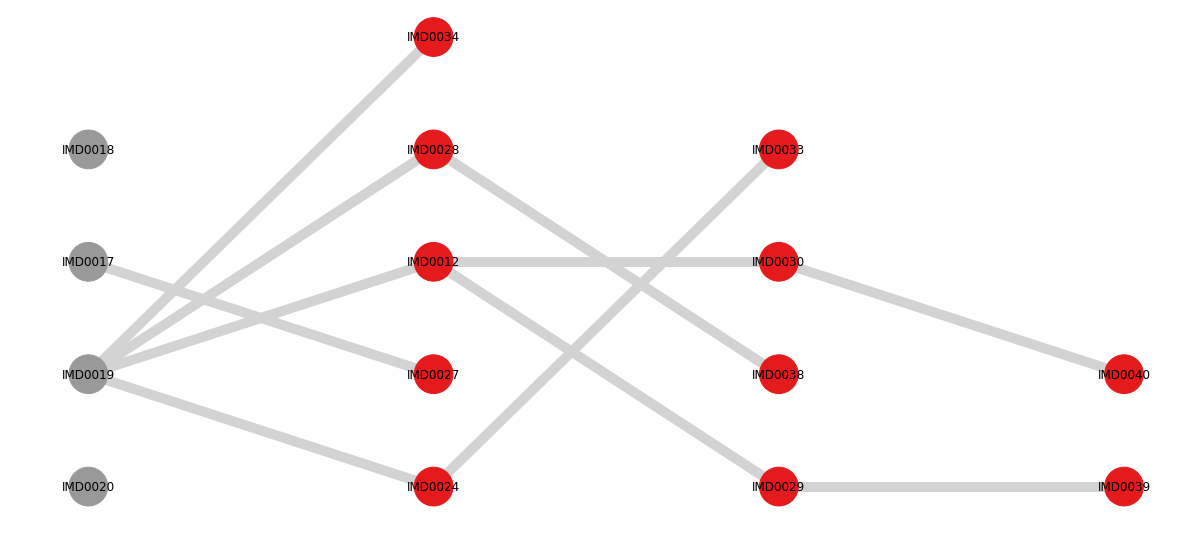

In [66]:
de = []
para = []
links = {'from': de, 'to': para}
ids = []
groups = []
car = {'ID': ids, 'myvalue': groups}
pos = {}
ch = {1: [1,2,3,4], 2: [1,2,3,4,5], 3:[1,2,3,4], 4:[1,2]}

for _, row in df_grade.iterrows():
    ids.append(row.codigo)
    
    pos[row.codigo] = ((row.semestre_oferta, ch[row.semestre_oferta].pop()), size)
    if (str(row.pre_requisito).lower()!='nan'):
        de.append(row.pre_requisito)
        para.append(row.codigo)
        groups.append('group1')
    else:
        de.append(row.codigo)
        para.append(row.codigo)
        groups.append('group2')
        pass
        
df = pd.DataFrame(links)
 
carac = pd.DataFrame(car)
 
G=nx.from_pandas_edgelist(df, 'from', 'to', edge_attr=True)
 
G.nodes()

carac= carac.set_index('ID')
carac=carac.reindex(G.nodes())
carac['myvalue']=pd.Categorical(carac['myvalue'])
carac['myvalue'].cat.codes

plt.rcParams['figure.figsize'] = (16,7)
for v in posicoes_order:
    posicoes[v[0]] = v[1][0]

nx.draw(G, posicoes, with_labels=True, node_color=carac['myvalue'].cat.codes, cmap=plt.cm.Set1, node_size=1500, edge_color='lightgrey', width=10.0)

____